loss vs number of layers

In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
print('refnx: %s\nscipy: %s\nnumpy: %s' % (refnx.version.version,
                   scipy.version.version, np.version.version))
%matplotlib inline
#%matplotlib noteboo

refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4


In [14]:
figI = 0
# simple structure
thicks_true = [10,120,100,130,10]
bs_true = [0,5,4.5,5,10]
roughs_true = [0,0,0,0,0]
# bs = [5,4.5,5]
# thicks = [120,100,130]
# roughs = [0,0,0]
bs = bs_true
thicks = thicks_true
roughs = roughs_true
loss = 1.
no_layers = len(bs)
no_layers = len(bs_true)
# no_layers = 3
layers = []
names = []
#names = ['layer1','layer2']
for i in range(no_layers):
    names.append('layer'+str(i))
for i in range(no_layers):
        sld = SLD(bs[i],name=names[i])
        layers.append(sld(thicks[i],roughs[i]))
structure = layers[0]
for layer in layers[1:]:
    structure|=layer
print("done")

done


<IPython.core.display.Javascript object>


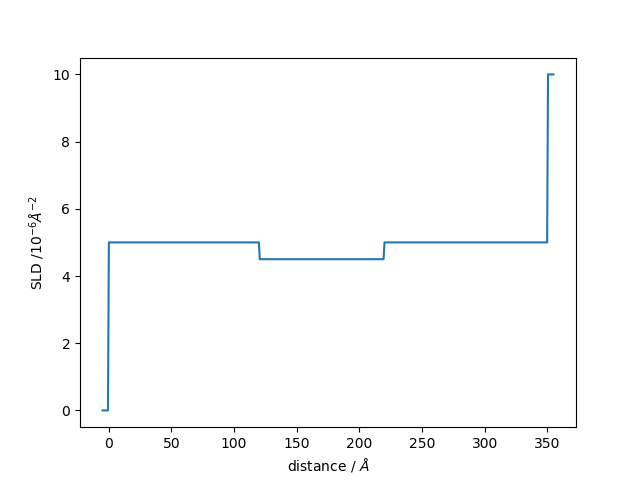

done


In [15]:
%matplotlib notebook
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
print("done")

In [5]:
%%time
from seperat import seperateNLayer as snl
import make_sim_data as msd
datas = []
losses = [0.5,0.75,0.9,1]
lnPosts = []
resolution = 5.
for loss in losses:
    model = ReflectModel(structure, bkg=3e-6, dq=resolution)
    q = np.linspace(0.005, 0.3, 70)
    R = model(q, x_err=resolution)*loss
    sim_dR = msd.main(sim_q=q,sim_R=R)*10
    data = Data1D(data= (q,R,sim_dR))
    for i in range(1,5):
        lnPost = snl(data, i)
        lnPosts.append(lnPost)


refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4
csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]
csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54

In [2]:
def toArray(line,n,m=-1):
    array=line.reshape((n,m))
    return array

def meshGraph(line, xs, ys, xlabel="", ylabel="", title="",printType="", figI=0):
    #resolutions = [1.,3.,7.,9.]
    #dRScaleBys = [5,10,15,20]
    ha_s = ["left", "center", "center", "right"]

    print(printType,line)#"not thickness limited ln(post):",line)
    n, m = len(xs), len(ys)
    zs = toArray(line,m,n)
#     zs= np.array(lnPosts1).reshape(len(xs), len(ys))
    plt.figure(figI)
    figI+=1
    plt.contour(xs,ys,zs,alpha=0.5);
    plt.contourf(xs,ys,zs,alpha=0.3);
    plt.colorbar();
    for i in range(len(xs)):
        for j in range(len(ys)):
            plt.scatter(xs[i],ys[j],c="red",marker="x");
            ha = ha_s[i]
            plt.annotate("%.3f"%zs[j][i],(xs[i],ys[j]),
                        horizontalalignment=ha, fontsize="small", verticalalignment='bottom')
    # for x in dRScaleBys:
    #     for y in resolutions:
    #         plt.scatter(x,y,c="red",marker="x");
    plt.ylabel(ylabel);#"dq");
    plt.xlabel(xlabel);#"dR scaled by");
    plt.title(title);#"thickness limited contour plot of ln(evidence) for dq vs dR scaled by");
    plt.tight_layout();
    plt.show();
    return figI

thickness limited contour plot of ln(evidence) for layers vs loss [-144232.45051965 -136629.97948727 -134728.85635124 -134578.20899748
  -57000.20965185  -32910.18625754  -32436.86874761  -32357.3548129
  -38930.64868996   -3985.68943925   -3990.655798     -3988.67939953
  -44363.75257096    1235.90817063    1533.51000101    1485.84469812]


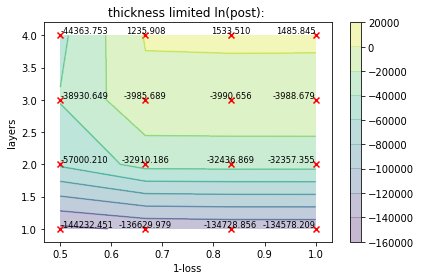

1

In [3]:
line = np.array([-144232.4505196492, -136629.97948726744, -134728.85635123646, -134578.20899747947, -57000.2096518467, -32910.18625753933, -32436.868747605633, -32357.35481290235, -38930.6486899644, -3985.689439252428, -3990.6557979986624, -3988.679399532851, -44363.752570957986, 1235.90817062648, 1533.510001013522, 1485.8446981208751])
nLayers = [i for i in range(1,5)]
losses = np.linspace(0.5,1.,4)
xlabel="1-loss"
ylabel="layers"
title="thickness limited contour plot of ln(evidence) for layers vs loss"
meshGraph(line, losses, nLayers, xlabel, ylabel,"thickness limited ln(post): ", title)

# line=np.array([-22028.184688274174, -21411.130122513667, -20803.32327289713, -20710.614379519593, -8527.527221022197, -7092.5936011602935, -6987.740416257086, -6968.700627526253, -2826.7346983527063, -1294.5262220939194, -1287.7645545727062, -1289.860225072015, -1818.2508356726373, 72.29432028604006, 91.11035384560891, 89.53605708217408])
# title="not thickness limited contour plot of ln(evidence) for layers vs loss"
# meshGraph(line, losses, nLayers, xlabel, ylabel,"not thickness limited ln(post): ", title)


# previous

[-144232.4505196492, -136629.97948726744, -134728.85635123646, -134578.20899747947, -57000.2096518467, -32910.18625753933, -32436.868747605633, -32357.35481290235, -38930.6486899644, -3985.689439252428, -3990.6557979986624, -3988.679399532851, -44363.752570957986, 1235.90817062648, 1533.510001013522, 1485.8446981208751]


<IPython.core.display.Javascript object>


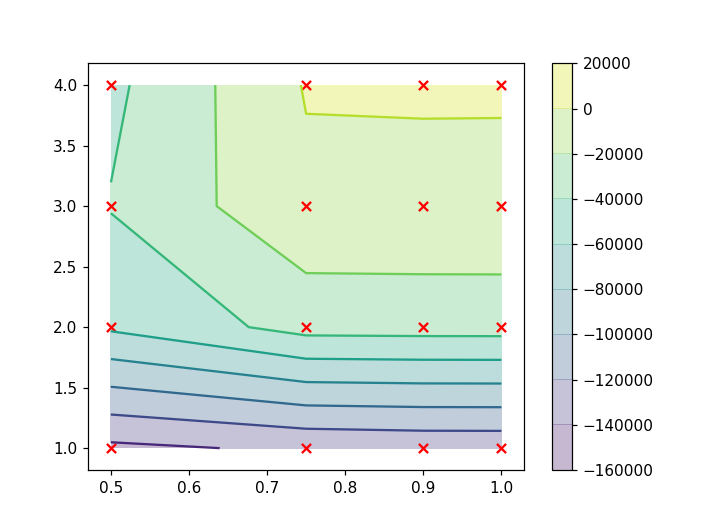

In [9]:
print(lnPosts)
lenLosses = len(losses)
nLayers = [i for i in range(1,5)]
zss=[]
for i in range(lenLosses):
    zs=[]
    for j in nLayers:
        z = lnPosts[lenLosses*i+j-1]
        zs.append(z)
    zss.append(zs)
plt.figure(figI)
figI+=1
plt.contour(losses,nLayers,zss)
plt.contourf(losses,nLayers,zss,alpha=0.3)
plt.colorbar()
for x in losses:
    for y in nLayers:
        plt.scatter(x,y,c="red",marker="x")
plt.ylabel("loss")
plt.xlabel("layers")

In [16]:
maxLength = 350
def logp_extra(model, data=None):
    returns = 0
    if sum(model.structure.slabs()[1:-1,0])>maxLength:
        returns = -np.inf
    return returns

In [23]:
from sepObjective import getObjective
import make_sim_data as msd


# resolutions = [1.,3.,7.,9.]
datas = []
# losses = [0.5,0.75,0.9,1]
losses = np.linspace(0.5,1.,5)
lnPosts = []
resolution = 5.
for loss in losses:
    model = ReflectModel(structure, bkg=3e-6, dq=resolution)
    q = np.linspace(0.005, 0.3, 70)
    R = model(q, x_err=resolution)*loss
    sim_dR = msd.main(sim_q=q,sim_R=R)*10
    data = Data1D(data= (q,R,sim_dR))
    for i in range(1,5):
        print("loss:",loss,"n layers:",i)
        objective = getObjective(data=data, nLayers=i,logpExtra=logp_extra)
        fitter = CurveFitter(objective)
        fitter.fit("differential_evolution", target="nlpost")
        lnPost = objective.logpost()
        lnPosts.append(lnPost)

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]
loss: 0.5 n layers: 1
loss: 0.5 n layers: 2
loss: 0.5 n layers: 3
loss: 0.5 n layers: 4
csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.5567

[-11075.273271974418, -10701.844623087964, -10598.865165137533, -10586.748733727574, -6866.279090466205, -6003.615205050414, -5916.486497363521, -5890.512136037603, -3698.407088528064, -2598.690660164139, -2555.2091278056955, -2566.017009968781, -1956.7446297435947, -562.5096860698789, -562.245032617213, -557.1677741230756, -1811.5634629927538, 71.80960602291306, 91.17229594248195, 87.09973192461796]
[[-11075.27327197 -10701.84462309 -10598.86516514 -10586.74873373
   -6866.27909047]
 [ -6003.61520505  -5916.48649736  -5890.51213604  -3698.40708853
   -2598.69066016]
 [ -2555.20912781  -2566.01700997  -1956.74462974   -562.50968607
    -562.24503262]
 [  -557.16777412  -1811.56346299     71.80960602     91.17229594
      87.09973192]] [[-11075.273271974418, -10701.844623087964, -10598.865165137533, -10586.748733727574], [-6866.279090466205, -6003.615205050414, -5916.486497363521, -5890.512136037603], [-3698.407088528064, -2598.690660164139, -2555.2091278056955, -2566.017009968781], [-1

<IPython.core.display.Javascript object>


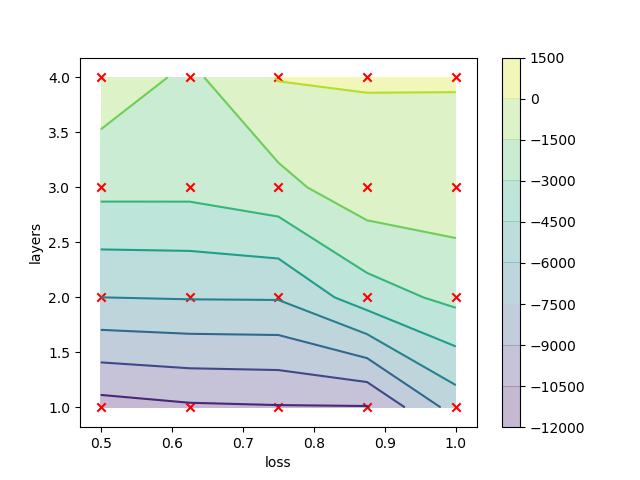

In [26]:
%%time
print(lnPosts)
lenLosses = len(losses)
nLayers = [i for i in range(1,5)]

zss=[]
for i in range(lenLosses):
    zs=[]
    for j in nLayers:
        z = lnPosts[len(nLayers)*i+j-1]
        zs.append(z)
    zss.append(zs)
    
z = np.array(lnPosts).reshape((-1,lenLosses))
print(z,zss)

plt.figure(figI);
figI+=1
plt.contour(losses,nLayers,z);
plt.contourf(losses,nLayers,z,alpha=0.3);
plt.colorbar();
for x in losses:
    for y in nLayers:
        plt.scatter(x,y,c="red",marker="x");
plt.ylabel("layers");
plt.xlabel("loss");